<a href="https://colab.research.google.com/github/deepalsr/ml-Lab/blob/main/ml_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_curve, auc
)


In [5]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

In [8]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score: 0.9824561403508771


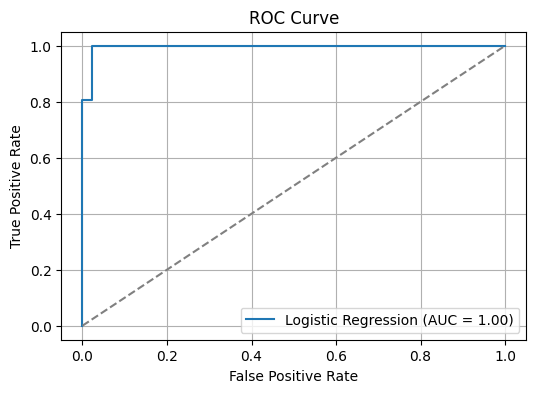

In [20]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class '1' (benign)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

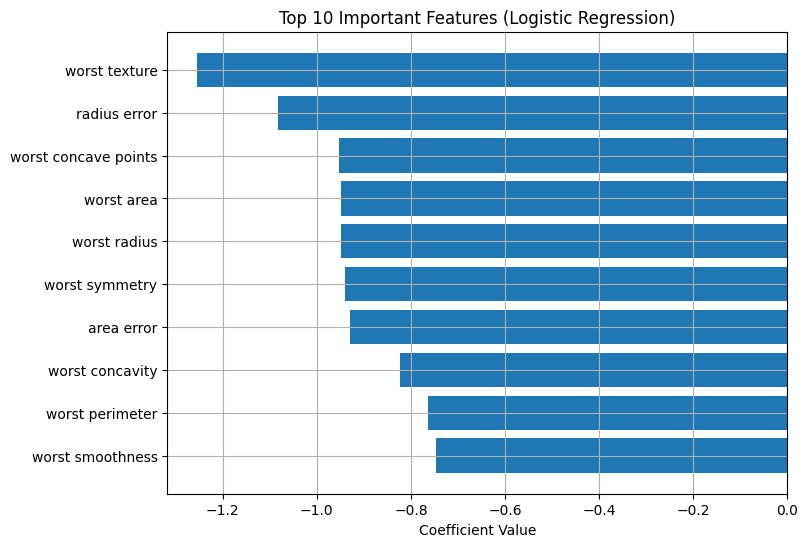

In [21]:
coefficients = model.coef_[0]
sorted_idx = np.argsort(np.abs(coefficients))[::-1][:10]
plt.figure(figsize=(8, 6))
plt.barh(range(10), coefficients[sorted_idx], align='center')
plt.yticks(range(10), feature_names[sorted_idx])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Important Features (Logistic Regression)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [25]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [27]:
y_pred = tree_clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[39  3]
 [ 4 68]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.91      0.93      0.92        42
      benign       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

Accuracy: 0.9385964912280702


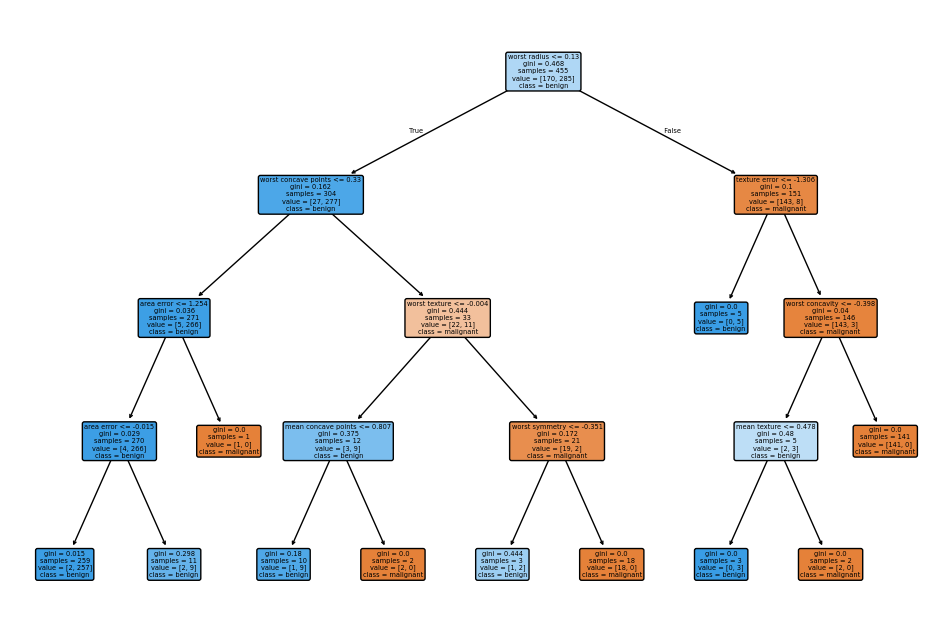

In [28]:
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, filled=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.show()